# Group Project Data Analysis
## To what extent does the increasing use of video chats mitigate feelings of isolation, and can it serve as a substitute for in-person interactions?

In [1]:
import pandas as pd

# Define the URLs for the CSV files
url_cols = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
url_data = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

# Read the CSV files from the URLs
cols = pd.read_csv(url_cols)
data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])

# Check for completely empty columns
empty = (data.isna().sum() == data.shape[0])

# Keep non-empty columns only
data = data[empty.index[~empty]]

# Print the shape of the data
data.shape


/tmp/ipykernel_166/2068529200.py:9: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])


(11431, 1779)

In [2]:
data.REMOVE_case.value_counts()

REMOVE_case
No       10018
Yes       1153
Maybe      260
Name: count, dtype: int64

In [3]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape

(10018, 1779)

In [4]:
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape

(865, 1779)

In [5]:
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape

(850, 1779)

In [6]:
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape

(850, 166)

In [7]:
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1])
dataV2_cohortV3.shape


(850, 166)

### This research problem explores the extent to which video chats alleviate feelings of isolation, and also focusing on whether they can replicate the emotional and psychological benefits of physical interactions.

### The findings aim to inform how video technology can be leveraged to address social isolation, particularly for populations with limited mobility or geographically distant loved ones, while also highlighting its role in broader societal trends toward digital communication.

### First, I manipulated the data by changing variables with categorical data into a ranked system (1-7)

In [8]:
dataV2_cohortV3['CONNECTION_activities_coffee_p3m'].unique()

array(['A few times a week', 'Less than monthly', 'Weekly',
       'A few times a month', 'Not in the past three months',
       'Daily or almost daily', 'Monthly', nan], dtype=object)

In [9]:
dataV2_cohortV3['CONNECTION_activities_video_chat_p3m'].unique()

array(['Less than monthly', 'Not in the past three months',
       'A few times a week', 'A few times a month',
       'Daily or almost daily', 'Monthly', 'Weekly', nan], dtype=object)

In [10]:
loneliness_map = {
    'Often': 1,
    'Some of the time': 1,
    'Hardly Ever': 0
}


In [11]:
video_chat_map = {'Not in the past three months': 1, 'Less than monthly': 2, 'Monthly': 3, 'A few times a month': 4, 'Weekly': 5, 'A few times a week': 6, 'Daily or almost daily': 7}
coffee_map = {'Not in the past three months': 1, 'Less than monthly': 2, 'Monthly': 3, 'A few times a month': 4, 'Weekly': 5, 'A few times a week': 6, 'Daily or almost daily': 7}




In [12]:
dataV2_cohortV3['LONELY_ucla_loneliness_scale_isolated'].unique()

array(['Often', 'Some of the time', nan, 'Hardly Ever'], dtype=object)

In [13]:
subset_data = dataV2_cohortV3[['CONNECTION_activities_coffee_p3m', 
                                'CONNECTION_activities_video_chat_p3m', 
                                'LONELY_ucla_loneliness_scale_isolated']].copy()
subset_data['video_chat_num'] = dataV2_cohortV3['CONNECTION_activities_video_chat_p3m'].map(video_chat_map)
subset_data['coffee_num'] = dataV2_cohortV3['CONNECTION_activities_coffee_p3m'].map(coffee_map)
subset_data['loneliness_num'] = dataV2_cohortV3['LONELY_ucla_loneliness_scale_isolated'].map(loneliness_map)
subset_data = subset_data.dropna()
subset_data

,CONNECTION_activities_coffee_p3m,CONNECTION_activities_video_chat_p3m,LONELY_ucla_loneliness_scale_isolated,video_chat_num,coffee_num,loneliness_num
19,A few times a week,Less than monthly,Often,2.0,6.0,1.0
21,Less than monthly,Not in the past three months,Some of the time,1.0,2.0,1.0
71,Weekly,A few times a week,Some of the time,6.0,5.0,1.0
77,A few times a month,Less than monthly,Some of the time,2.0,4.0,1.0
78,A few times a month,Less than monthly,Some of the time,2.0,4.0,1.0
...,...,...,...,...,...,...
11379,Weekly,A few times a week,Often,6.0,5.0,1.0
11380,A few times a week,A few times a month,Some of the time,4.0,6.0,1.0
11412,A few times a week,Weekly,Some of the time,5.0,6.0,1.0
11428,Less than monthly,A few times a week,Some of the time,6.0,2.0,1.0


### Now the data is manipulated, I will start conducting my statistical tests:

### Video Chats and Isolation

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns

# Calculate the median of video_chat_num
median_value = subset_data['video_chat_num'].median()

# Separate the data into frequent and infrequent groups
frequent_group = subset_data[subset_data['video_chat_num'] > median_value]
infrequent_group = subset_data[subset_data['video_chat_num'] <= median_value]


/tmp/ipykernel_166/2399211936.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(frequent_group['loneliness_num'], shade=True, alpha=0.5, label='Frequent Group', color='blue')
/tmp/ipykernel_166/2399211936.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(infrequent_group['loneliness_num'], shade=True, alpha=0.5, label='Infrequent Group', color='orange')


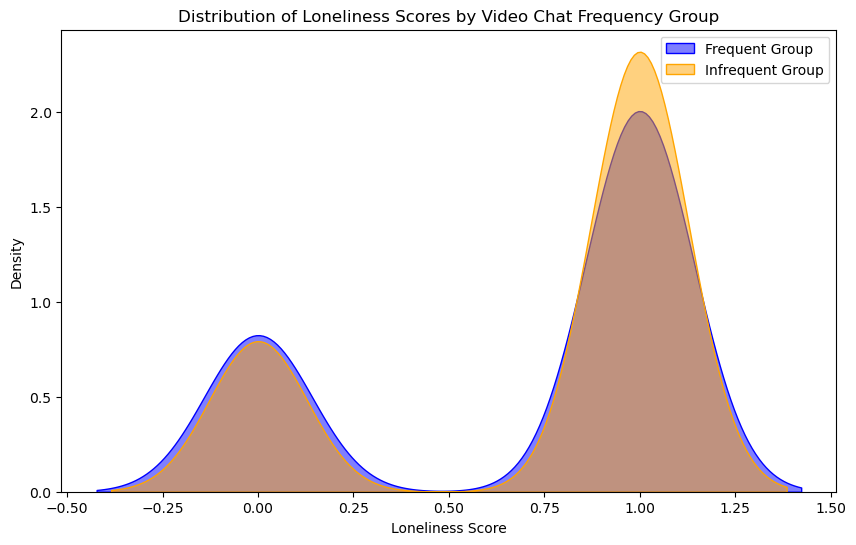

In [15]:
# Visualize distributions with transparency for better overlap visibility
plt.figure(figsize=(10, 6))

# Add transparent density plots
sns.kdeplot(frequent_group['loneliness_num'], shade=True, alpha=0.5, label='Frequent Group', color='blue')
sns.kdeplot(infrequent_group['loneliness_num'], shade=True, alpha=0.5, label='Infrequent Group', color='orange')

# Add labels and title
plt.title('Distribution of Loneliness Scores by Video Chat Frequency Group')
plt.xlabel('Loneliness Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [16]:
# Bootstrapping function to calculate means
def bootstrap_mean(data, n_iterations=1000):
    boot_means = []
    for _ in range(n_iterations):
        # Resample data with replacement
        sample = data.sample(n=len(data), replace=True)
        # Calculate mean for loneliness_num
        boot_means.append(sample['loneliness_num'].mean())
    return np.array(boot_means)


In [17]:
# Example bootstrapping procedure
import numpy as np

# Set the number of bootstraps
n_bootstraps = 1000

# Initialize lists to store the bootstrapped means
frequent_boot_means = []
infrequent_boot_means = []

# Perform bootstrapping for the frequent group
for _ in range(n_bootstraps):
    boot_sample = frequent_group['loneliness_num'].sample(n=len(frequent_group), replace=True)
    frequent_boot_means.append(boot_sample.mean())

# Perform bootstrapping for the infrequent group
for _ in range(n_bootstraps):
    boot_sample = infrequent_group['loneliness_num'].sample(n=len(infrequent_group), replace=True)
    infrequent_boot_means.append(boot_sample.mean())


In [18]:
# Generate bootstrap means for each group
frequent_boot_means = bootstrap_mean(frequent_group)
infrequent_boot_means = bootstrap_mean(infrequent_group)


In [19]:
# Calculate the difference in means for each bootstrap iteration
boot_mean_differences = frequent_boot_means - infrequent_boot_means


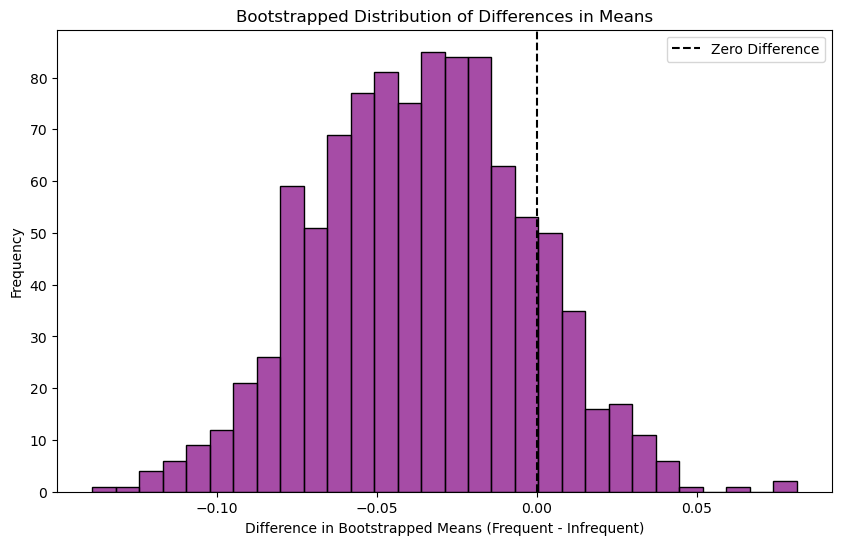

In [20]:
# Calculate the bootstrapped differences
boot_diff = frequent_boot_means - infrequent_boot_means

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
sns.histplot(boot_diff, bins=30, color='purple', alpha=0.7)

# Add a vertical line at 0 for reference
plt.axvline(0, color='black', linestyle='--', label='Zero Difference')

# Add labels and title
plt.title('Bootstrapped Distribution of Differences in Means')
plt.xlabel('Difference in Bootstrapped Means (Frequent - Infrequent)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [21]:
# Calculate the 2.5th and 97.5th percentiles for the confidence interval
lower_bound = np.percentile(boot_mean_differences, 2.5)
upper_bound = np.percentile(boot_mean_differences, 97.5)

# Output the confidence interval
print(f"95% Confidence Interval for the difference in means: [{lower_bound}, {upper_bound}]")


95% Confidence Interval for the difference in means: [-0.10002197802197811, 0.028357142857142883]


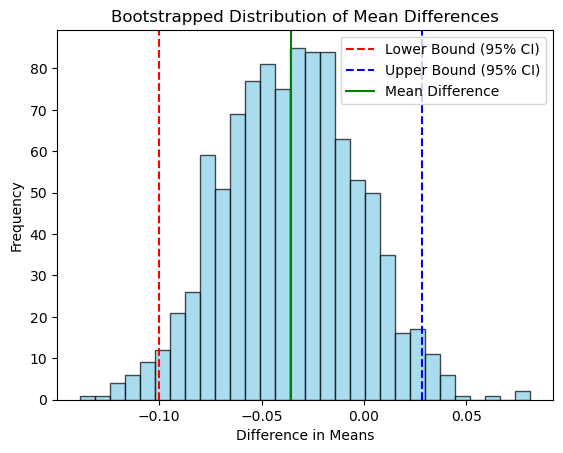

In [22]:
import matplotlib.pyplot as plt

# Plot the distribution of mean differences
plt.hist(boot_mean_differences, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (95% CI)')
plt.axvline(np.mean(boot_mean_differences), color='green', linestyle='-', label='Mean Difference')
plt.title("Bootstrapped Distribution of Mean Differences")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [23]:
# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_diff, 2.5)
upper_bound = np.percentile(boot_diff, 97.5)

# Print the confidence interval
print(f"95% Confidence Interval for the Difference in Means: ({lower_bound:.2f}, {upper_bound:.2f})")

# Check if zero is in the confidence interval
if lower_bound > 0 or upper_bound < 0:
    print("The confidence interval does not include 0, indicating a significant difference.")
else:
    print("The confidence interval includes 0, indicating no significant difference.")


95% Confidence Interval for the Difference in Means: (-0.10, 0.03)
The confidence interval includes 0, indicating no significant difference.


## Coffee and Isolation

In [24]:
# Separate the groups by median coffee engagement
coffee_median = subset_data['coffee_num'].median()
frequent_coffee = subset_data[subset_data['coffee_num'] > coffee_median]
infrequent_coffee = subset_data[subset_data['coffee_num'] <= coffee_median]


In [25]:
# Bootstrapping for frequent coffee engagement group
frequent_coffee_boot_means = []
for _ in range(1000):
    sample = frequent_coffee['loneliness_num'].sample(frac=1, replace=True)
    frequent_coffee_boot_means.append(sample.mean())

# Bootstrapping for infrequent coffee engagement group
infrequent_coffee_boot_means = []
for _ in range(1000):
    sample = infrequent_coffee['loneliness_num'].sample(frac=1, replace=True)
    infrequent_coffee_boot_means.append(sample.mean())


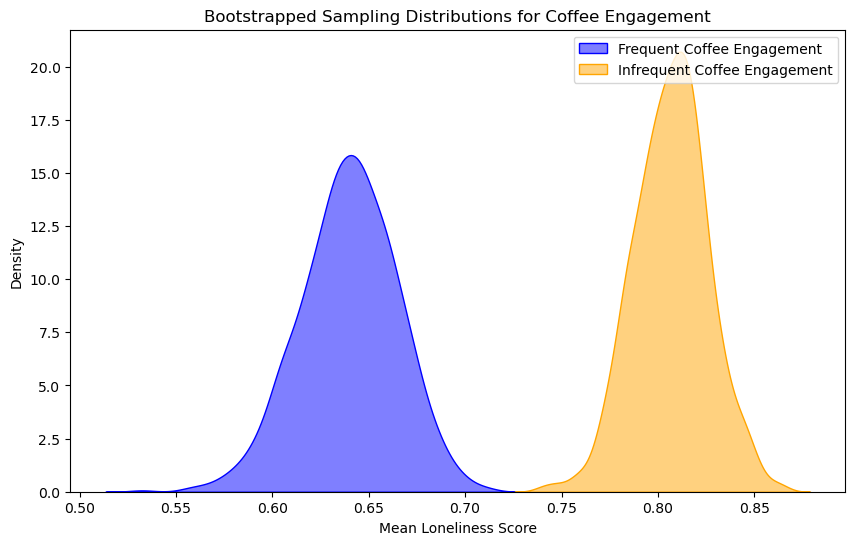

In [26]:
# Visualize the bootstrapped distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(frequent_coffee_boot_means, label='Frequent Coffee Engagement', fill=True, alpha=0.5, color='blue')
sns.kdeplot(infrequent_coffee_boot_means, label='Infrequent Coffee Engagement', fill=True, alpha=0.5, color='orange')

plt.title('Bootstrapped Sampling Distributions for Coffee Engagement')
plt.xlabel('Mean Loneliness Score')
plt.ylabel('Density')
plt.legend()
plt.show()


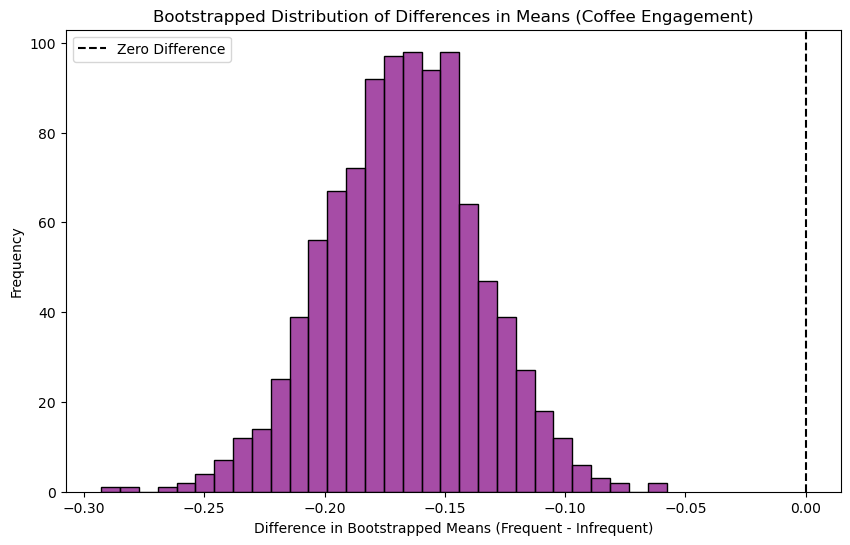

In [27]:
# Calculate the difference in means between frequent and infrequent coffee groups
coffee_diff = np.array(frequent_coffee_boot_means) - np.array(infrequent_coffee_boot_means)

# Visualize the distribution of differences
plt.figure(figsize=(10, 6))
sns.histplot(coffee_diff, bins=30, color='purple', alpha=0.7)

plt.axvline(0, color='black', linestyle='--', label='Zero Difference')
plt.title('Bootstrapped Distribution of Differences in Means (Coffee Engagement)')
plt.xlabel('Difference in Bootstrapped Means (Frequent - Infrequent)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [28]:
# Calculate the 95% confidence interval
coffee_lower = np.percentile(coffee_diff, 2.5)
coffee_upper = np.percentile(coffee_diff, 97.5)

# Print the confidence interval
print(f"95% Confidence Interval for Coffee Engagement Difference: ({coffee_lower:.2f}, {coffee_upper:.2f})")

# Check if zero is in the confidence interval
if coffee_lower > 0 or coffee_upper < 0:
    print("The confidence interval does not include 0, indicating a significant difference for coffee engagement.")
else:
    print("The confidence interval includes 0, indicating no significant difference for coffee engagement.")


95% Confidence Interval for Coffee Engagement Difference: (-0.23, -0.11)
The confidence interval does not include 0, indicating a significant difference for coffee engagement.


## Now is there a relationship between variables?

In [29]:
# Define coffee engagement categories based on the coffee_num scale
coffee_categories = ['Low', 'Medium', 'High']
subset_data['coffee_category'] = pd.cut(subset_data['coffee_num'], bins=[0, 2, 4, 7], labels=coffee_categories)

# Define isolation categories based on the loneliness_num scale
isolation_categories = ['Not Isolated', 'Isolated']
subset_data['isolation_category'] = pd.cut(subset_data['loneliness_num'], bins=[0, 0.5, 1], labels=isolation_categories)

# Create a contingency table
contingency_table = pd.crosstab(subset_data['coffee_category'], subset_data['isolation_category'])
print(contingency_table)


isolation_category  Isolated
coffee_category             
Low                      351
Medium                   148
High                      88


In [30]:
from scipy.stats import chi2_contingency

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation of the p-value
alpha = 0.05  # Significance level
if p < alpha:
    print("The p-value is less than 0.05, so we reject the null hypothesis. There is a significant dependency between coffee engagement and isolation.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis. There is no significant dependency between coffee engagement and isolation.")


Chi-Squared Statistic: 0.00
p-value: 1.0000
Degrees of Freedom: 0
Expected Frequencies: 
[[351.]
 [148.]
 [ 88.]]
The p-value is greater than 0.05, so we fail to reject the null hypothesis. There is no significant dependency between coffee engagement and isolation.


## Linear Regression: predict the value of one variable based on the other

Linear regression equation: Loneliness = 0.87 + -0.05 * Coffee Engagement


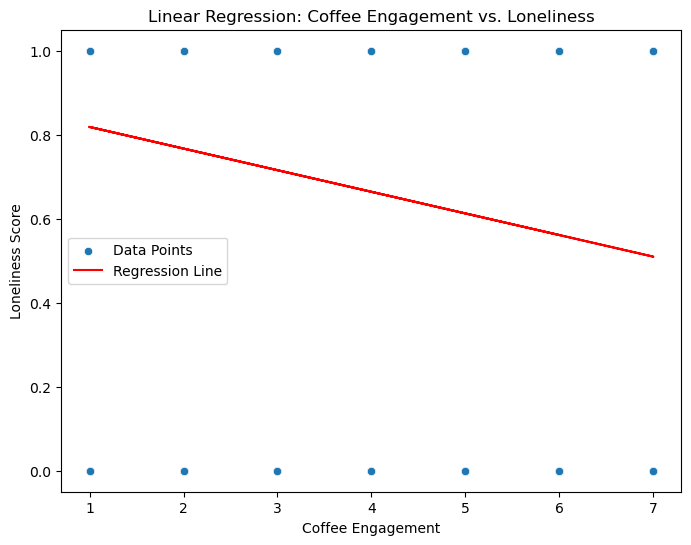

In [31]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns
X = subset_data[['coffee_num']]  # Independent variable: coffee engagement
y = subset_data['loneliness_num']  # Dependent variable: loneliness score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the model's coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Predict values using the model
y_pred = model.predict(X)

# Print the coefficients
print(f"Linear regression equation: Loneliness = {intercept:.2f} + {slope:.2f} * Coffee Engagement")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['coffee_num'], y=y, label='Data Points')
plt.plot(X['coffee_num'], y_pred, color='red', label='Regression Line')

plt.title('Linear Regression: Coffee Engagement vs. Loneliness')
plt.xlabel('Coffee Engagement')
plt.ylabel('Loneliness Score')
plt.legend()
plt.show()


## Multivariable Regression

R-squared: 0.0391


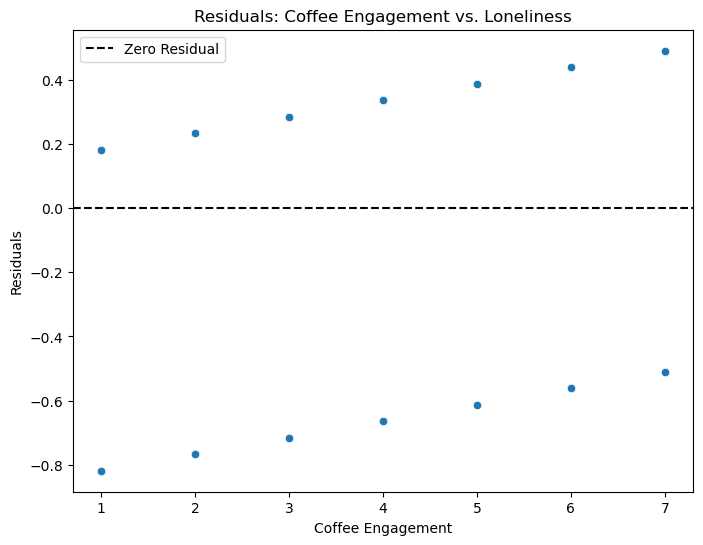

In [32]:
# Get the R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# Optionally, print residuals (difference between observed and predicted values)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['coffee_num'], y=residuals)
plt.axhline(0, color='black', linestyle='--', label='Zero Residual')
plt.title('Residuals: Coffee Engagement vs. Loneliness')
plt.xlabel('Coffee Engagement')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [33]:
import statsmodels.api as sm

# Perform the multiple linear regression with the new data
X = subset_data[['video_chat_num', 'coffee_num']]  # Independent variables
X = sm.add_constant(X)  # Add constant (intercept) to the model
y = subset_data['loneliness_num']  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of the model
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:         loneliness_num   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     16.59
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           8.70e-08
Time:                        01:34:04   Log-Likelihood:                -473.01
No. Observations:                 805   AIC:                             952.0
Df Residuals:                     802   BIC:                             966.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8862      0.036     24.

### video_chat_num: -0.0059
The coefficient for video_chat_num is negative, but very small (-0.0059), suggesting a slight negative association between video chat frequency and loneliness. However, the p-value is 0.460, which is much higher than the typical threshold of 0.05, indicating that the effect of video chat on loneliness is not statistically significant. Therefore, you can't confidently claim that video chat use has an impact on loneliness based on this model.

### coffee_num: -0.0507
The coefficient for coffee_num is negative (-0.0507), meaning that increased coffee consumption is associated with lower loneliness scores. This coefficient is statistically significant (p-value = 0.000), indicating that coffee consumption has a significant negative relationship with loneliness. A one-unit increase in coffee consumption is associated with a decrease of 0.0507 in loneliness score, all else being equal.

Video chat usage does not appear to have a significant relationship with loneliness in this model, as indicated by its high p-value (0.460).

Coffee consumption has a significant negative effect on loneliness, suggesting that higher coffee consumption is associated with lower loneliness scores.

The model fit is low, as indicated by the R-squared value of 0.040, meaning there are likely other important predictors of loneliness that are not included in the model.

The residuals are not perfectly normally distributed, and there may be some autocorrelation in the residuals, suggesting that the model could be improved by considering other factors or alternative modeling approaches.

## Trying to Improve the Data: Adding more variables

CONNECTION_activities_board_games_p3m: Played a board game with others.

CONNECTION_activities_walk_p3m: Went for a walk with someone.

In [34]:
dataV2_cohortV3['CONNECTION_activities_board_games_p3m'].unique()

array(['Not in the past three months', 'Less than monthly', 'Monthly',
       'Weekly', 'A few times a week', 'A few times a month',
       'Daily or almost daily', nan], dtype=object)

In [35]:
dataV2_cohortV3['CONNECTION_activities_walk_p3m'].unique()

array(['Daily or almost daily', 'A few times a week',
       'A few times a month', 'Less than monthly', 'Monthly', 'Weekly',
       'Not in the past three months', nan], dtype=object)

In [36]:
# Define the mappings for board games, walk, coffee, and video chat activities
board_games_map = {
    'Not in the past three months': 1,
    'Less than monthly': 2,
    'Monthly': 3,
    'A few times a month': 4,
    'Weekly': 5,
    'A few times a week': 6,
    'Daily or almost daily': 7
}

walk_map = {
    'Not in the past three months': 1,
    'Less than monthly': 2,
    'Monthly': 3,
    'Weekly': 4,
    'A few times a week': 5,
    'Daily or almost daily': 6,
    'A few times a month': 7
}

coffee_map = {
    'Not in the past three months': 1,
    'Less than monthly': 2,
    'Monthly': 3,
    'A few times a month': 4,
    'Weekly': 5,
    'A few times a week': 6,
    'Daily or almost daily': 7
}

video_chat_map = {
    'Not in the past three months': 1,
    'Less than monthly': 2,
    'Monthly': 3,
    'A few times a month': 4,
    'Weekly': 5,
    'A few times a week': 6,
    'Daily or almost daily': 7
}

# Select the relevant columns and create new columns for numeric values
subset_data = dataV2_cohortV3[['CONNECTION_activities_board_games_p3m', 
                                'CONNECTION_activities_walk_p3m', 
                                'CONNECTION_activities_coffee_p3m',
                                'CONNECTION_activities_video_chat_p3m', 
                                'LONELY_ucla_loneliness_scale_isolated']].copy()

# Apply the mappings to the DataFrame
subset_data['board_games_num'] = dataV2_cohortV3['CONNECTION_activities_board_games_p3m'].map(board_games_map)
subset_data['walk_num'] = dataV2_cohortV3['CONNECTION_activities_walk_p3m'].map(walk_map)
subset_data['coffee_num'] = dataV2_cohortV3['CONNECTION_activities_coffee_p3m'].map(coffee_map)
subset_data['video_chat_num'] = dataV2_cohortV3['CONNECTION_activities_video_chat_p3m'].map(video_chat_map)
subset_data['loneliness_num'] = dataV2_cohortV3['LONELY_ucla_loneliness_scale_isolated'].map(loneliness_map)

# Drop rows with missing values
subset_data = subset_data.dropna()

# View the cleaned subset data
subset_data


,CONNECTION_activities_board_games_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_video_chat_p3m,LONELY_ucla_loneliness_scale_isolated,board_games_num,walk_num,coffee_num,video_chat_num,loneliness_num
19,Not in the past three months,Daily or almost daily,A few times a week,Less than monthly,Often,1.0,6.0,6.0,2.0,1.0
21,Less than monthly,A few times a week,Less than monthly,Not in the past three months,Some of the time,2.0,5.0,2.0,1.0,1.0
71,Not in the past three months,A few times a month,Weekly,A few times a week,Some of the time,1.0,7.0,5.0,6.0,1.0
77,Not in the past three months,Less than monthly,A few times a month,Less than monthly,Some of the time,1.0,2.0,4.0,2.0,1.0
78,Not in the past three months,Monthly,A few times a month,Less than monthly,Some of the time,1.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
11379,Not in the past three months,A few times a week,Weekly,A few times a week,Often,1.0,5.0,5.0,6.0,1.0
11380,A few times a month,A few times a week,A few times a week,A few times a month,Some of the time,4.0,5.0,6.0,4.0,1.0
11412,Less than monthly,A few times a week,A few times a week,Weekly,Some of the time,2.0,5.0,6.0,5.0,1.0
11428,Not in the past three months,Less than monthly,Less than monthly,A few times a week,Some of the time,1.0,2.0,2.0,6.0,1.0


In [37]:
import statsmodels.api as sm
import pandas as pd

# Prepare the data: define the independent variables and the dependent variable
# We'll predict loneliness_num (dependent variable) based on the other activities (independent variables)
X = subset_data[['board_games_num', 'walk_num', 'coffee_num', 'video_chat_num']]
y = subset_data['loneliness_num']

# Add a constant to the independent variables (this is for the intercept term in the regression model)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         loneliness_num   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.23e-08
Time:                        01:34:04   Log-Likelihood:                -465.86
No. Observations:                 802   AIC:                             941.7
Df Residuals:                     797   BIC:                             965.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9492      0.041     

## R-squared
R-squared of 0.052 means that about 5.2% of the variance in loneliness is explained by the four activities (board games, walking, coffee, and video chat). Although this is a slight improvement over the previous model, the explanatory power is still low.

F-statistic: 10.94 and Prob(F-statistic): 1.23e-08 suggest that the model is statistically significant.

## Coefficients
Board Games (coef = -0.0149): The negative coefficient suggests that more frequent board game activity may be associated with a slight decrease in loneliness, but the p-value of 0.216 indicates that this effect is not statistically significant.

Walking (coef = -0.0206): The negative coefficient suggests that more frequent walking may reduce loneliness. The p-value of 0.007 indicates that this effect is statistically significant.

Coffee (coef = -0.0415): Similar to the first model, coffee consumption is negatively associated with loneliness. The p-value of 0.000 confirms this relationship is statistically significant.

Video Chat (coef = -0.0007): The coefficient is very close to zero, indicating almost no relationship with loneliness. The p-value of 0.928 suggests that video chat frequency does not have a significant effect on loneliness.

## Summary
- Coffee consumption continues to have a strong and statistically significant negative relationship with loneliness in both models.
- Walking has a significant negative effect on loneliness in the 4-variable model.
- Board games and video chat do not show strong or significant effects on loneliness, based on the p-values.
#### The small increase in R-squared from 0.040 to 0.052 suggests that the additional variables (board games and walking) explain slightly more of the variance, but still leave most of the variance unexplained.